In [2]:
import math
import numpy as np
from copy import deepcopy
from random import randint

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs

In [3]:
groups = 4

# Generate random blob data with 5000 samples,  4 centers and 2 features
x, _ = make_blobs(n_samples=5000, centers=groups, n_features=2, random_state=195)


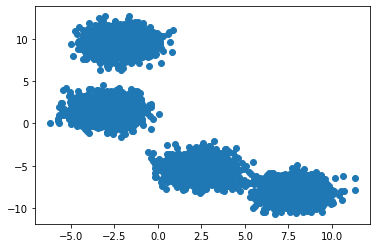

In [4]:
# visualize the dataset
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [6]:
# Create a function to generate N random centers
def generate_random_centers(x, k):
    n_features = x.shape[1]
    c_position = []
    for i in range(n_features):
        c_position.append(np.random.randint(np.min(x[:, i]), np.max(x[:, i]), size=k)) 

    return np.array(c_position).T

c_positions = generate_random_centers(x, groups)
c_positions.shape


(4, 2)

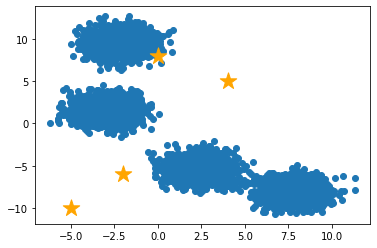

In [5]:
# Visualize the random centers
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(c_positions[:, 0], c_positions[:, 1], marker='*', s=300, c='orange')
plt.show()


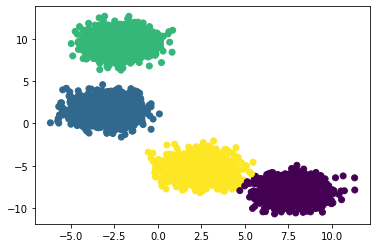

In [7]:
from sklearn.cluster import KMeans
# create the model of KMeans algorithm by function KMeans (save it to variable kmeans)
# we want to get 4 clusters
kmeans = KMeans(n_clusters = 4)
# fit the created model 
kmeans.fit(x)
# predict with your fitted model (save it to variable y_kmeans)
y_kmeans = kmeans.predict(x)
# create a scatter plot from X like before, just this time add y_kmeans to be the color, and add parameter cmap='viridis'
plt.scatter(x[:, 0], x[:, 1], c = y_kmeans)
# show the plot
plt.show()

In [8]:
# Helper functions to calculate the distance between a point and a center
def dist(a,b):
    com = a-b
    sum = 0
    for c in com:
        sum += c**2
    return math.sqrt(sum)
    
def dist_2d(a,b):
    squared_distance = 0
    for i in range(len(a)):
        squared_distance += (a[i][0] - b[i][0])**2 + (a[i][1] - b[i][1])**2
    dist = math.sqrt(squared_distance)
    return dist

In [9]:
def kmeans(x, number_of_clusters, threshold = 0.000001):
    # Generate random centers
    centers =  generate_random_centers(x, number_of_clusters)
    # craete empty list to store the clusters id of each element
    clusters = np.zeros(len(x))
    # create empty list to store the previous centers
    old_centers = np.zeros(centers.shape)
    #set error to 1
    error = 1

    # Iterate until error is less than threshold
    while error > threshold:

        # assign each element to the closest center
        # Iterate through each element
        for i in range(len(x)):
            # calculate the distance between the element and each center
            distances = [dist(x[i], c) for c in centers]
            # select the nearest center
            cluster = np.argmin(distances)
            # assign the element to the cluster
            clusters[i] = cluster        
        
        # save the centers as old centers
        old_centers = deepcopy(centers)
        centers = np.zeros(centers.shape)
        # calculate the new centers by taking the average of each cluster

        # Iterate through each cluster
        for j in range(0, number_of_clusters):
            # select the elements belonging to the cluster
            points = []
            for n in range(len(x)):
                if clusters[n] == j:
                   points.append(x[n])

            # calculate the mean of the cluster
            centers[j] = np.mean(points, axis=0)        
        
        # calculate the distance between the new and old centers
        error = dist_2d(centers, old_centers)
        
    return centers, clusters

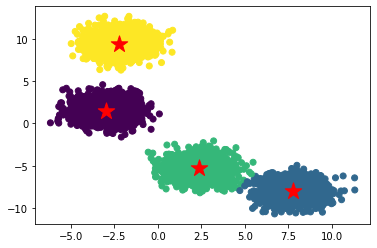

In [12]:
# Run the K-means algorithm with 4 clusters and visualize the results
new_clusters, p = kmeans(x,  4)
plt.scatter(x[:, 0], x[:, 1], c = p)
plt.scatter(new_clusters[:, 0], new_clusters[:, 1],  marker='*', s=300, c='r')
plt.show()

Number of clusters:  2


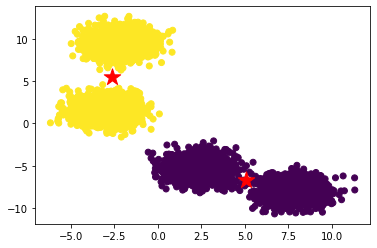

Number of clusters:  3


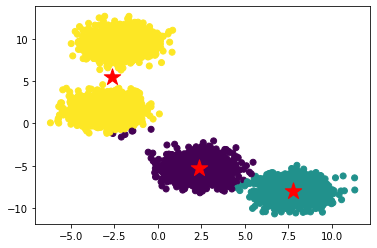

In [87]:
# Run the K-means algorithm with 2,3  clusters and visualize the results
for i in range(2,4):
    print("Number of clusters: ", i)
    new_clusters, p = kmeans(x,  i)
    plt.scatter(x[:, 0], x[:, 1], c = p)
    plt.scatter(new_clusters[:, 0], new_clusters[:, 1],  marker='*', s=300, c='r')
    plt.show()